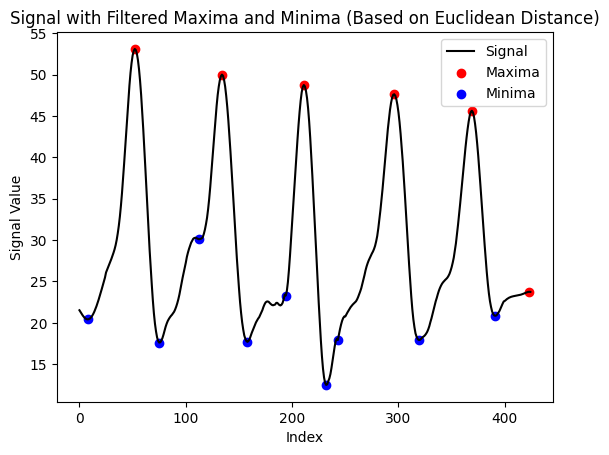

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('Data_1.txt')
maxima = []
minima = []
for i in range(1, len(data) - 1):
    if data[i] > data[i - 1] and data[i] > data[i + 1]:
        maxima.append((i, data[i]))
    if data[i] < data[i - 1] and data[i] < data[i + 1]:
        minima.append((i, data[i]))
def filter_extrema_with_distance(maxima, minima, min_distance):
    filtered_maxima = []
    filtered_minima = []

    last_maxima_index = -min_distance - 1
    last_minima_index = -min_distance - 1

    i, j = 0, 0

    while i < len(maxima) and j < len(minima):
        max_index, max_value = maxima[i]
        min_index, min_value = minima[j]
        distance = abs(max_index - min_index)

        if distance >= min_distance:
            if max_index < min_index:
                if max_index - last_maxima_index >= min_distance:
                    filtered_maxima.append((max_index, max_value))
                    last_maxima_index = max_index
                i += 1
            else:
                if min_index - last_minima_index >= min_distance:
                    filtered_minima.append((min_index, min_value))
                    last_minima_index = min_index
                j += 1
        else:
            if max_index < min_index:
                i += 1
            else:
                j += 1
    while i < len(maxima):
        max_index, max_value = maxima[i]
        if max_index - last_maxima_index >= min_distance:
            filtered_maxima.append((max_index, max_value))
            last_maxima_index = max_index
        i += 1

    while j < len(minima):
        min_index, min_value = minima[j]
        if min_index - last_minima_index >= min_distance:
            filtered_minima.append((min_index, min_value))
            last_minima_index = min_index
        j += 1

    return filtered_maxima, filtered_minima
filtered_maxima, filtered_minima = filter_extrema_with_distance(maxima, minima, min_distance)
maxima_indices, maxima_values = zip(*filtered_maxima) if filtered_maxima else ([], [])
minima_indices, minima_values = zip(*filtered_minima) if filtered_minima else ([], [])
plt.plot(data, label='Signal', color='black')
plt.scatter(maxima_indices, maxima_values, color='red', label='Maxima')
plt.scatter(minima_indices, minima_values, color='blue', label='Minima')
plt.xlabel('Index')
plt.ylabel('Signal Value')
plt.title('Signal with Filtered Maxima and Minima (Based on Euclidean Distance)')
plt.legend()
plt.show()
